# Monte Carlo Simulations - Lab

## Introduction

In order to calculate the precise probability of an event occurring, one needs to know the number of occurrences and the number of possible outcomes. If there are a large number of variables, these sample spaces can explode very quickly. Often, these spaces are so large that analyzing all possible outcomes is not  possible. As an alternative, these large sets can be approximated using Monte Carlo simulations. In this lab, you will conduct a Monte Carlo simulation of a permutation test that would otherwise be infeasible to compute.


## Objectives 

In this lab you will:
- Conduct a Monte Carlo simulation

## Exploding sample sizes

As we discussed in the previous lesson, permutation test sizes can quickly explode as our original sample sizes grow. To demonstrate this, create a graph to show how the number of permutations increases as we increase just one of the sample sizes. Assume that our first sample is of 25 individuals. From there, plot a graph of how the permutation test sample size increases drastically as our second sample increases from 10 to 200 individuals. (Assume that every new person has a unique blood pressure; a stretch of an assumption, but greatly simplifies our calculations for now.)

In [1]:
# Your code here
from scipy.special import comb
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

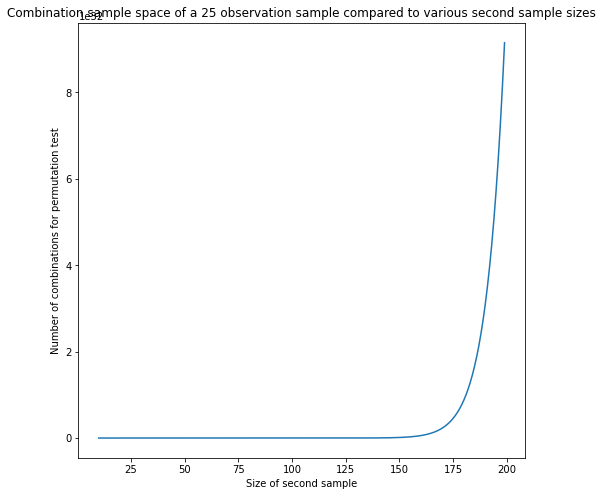

In [2]:
y = []
x = []
a = 25
for b in range(10, 200):
    x.append(b)
    y.append(comb(a + b, a))
plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.title('Combination sample space of a 25 observation sample compared to various second sample sizes')
plt.xlabel('Size of second sample')
plt.ylabel('Number of combinations for permutation test');

## Creating the Monte Carlo simulation

Let's expand upon our blood pressure example from the Resampling methods lab. Even with our previous sample sizes of a sample of 14 and a sample of 12, we had a total of over 9 million possible outcomes. As you can see from the graph above, this quantity continues to rapidly increase. As a result, it is often impractical or impossible to calculate all possible variations. Instead, use a Monte Carlo simulation to sample from the sample space in order to emulate a permutation test. While a precise simulation of a permutation test would record which ordered combinations we have already simulate, doing so greatly reduces the speed of the process. Below are the complete samples of two populations' blood pressure.  
  
Write a Monte Carlo simulation to sample from the permutation space. Be sure to not allow replacement so that no cases are repeated. Calculate the p-value after `10, 100, 500, 1000, 10**4, 10**5, 10**6, 2*10**6 and 5*10**6` iterations. Graph these to show how the p-value stabilizes and converges after a large number of iterations.

In [3]:
a = [109.6927759 , 120.27296943, 103.54012038, 114.16555857,
       122.93336175, 110.9271756 , 114.77443758, 116.34159338,
       130.72888419, 116.04552895, 114.8313492 , 117.52704641,
       109.06597142, 117.0317262 , 114.34876391, 111.32151926,
       108.90594481, 110.95040527,  99.15890727, 117.93581615,
       106.35644209, 112.88102458, 103.87574946, 111.88394265,
       115.42450119, 124.02872282, 116.19121625, 115.59471365,
       112.66413025, 118.30562665, 132.31196515, 117.99000948]
b = [123.98967482, 141.11969004, 117.00293412, 121.6419775 ,
       123.2703033 , 123.76944385, 105.95249634, 114.87114479,
       110.50162354, 121.31836918, 124.9483451 , 126.04639783,
       119.71433463, 117.49416398, 129.47657837, 115.57798929,
       117.36035264, 130.92919224, 104.43218778, 119.97610071,
       115.67085089, 113.77487389, 114.02470379, 116.64660978,
       117.3023355 , 116.30944159, 123.66560428, 117.87222118,
       128.8445079 , 111.7976685 , 117.25730744, 111.62121119,
       110.12277446, 112.7150916 , 129.21006268, 125.97287311,
       130.6878082 , 140.60768727, 121.95433026, 123.11996767,
       129.93260914, 121.01049611, 129.23680238]

In [4]:
#Your code here
# ⏰ This cell may take several minutes to run
diff_mu_a_b = np.mean(a) - np.mean(b)
num = 0
denom = 0
union = a + b
for i in range(5*10**6):
    # Generate ai
    ai = np.random.choice(union, size=len(a), replace=False)
    # Generate its compliment as bi
    bi = union.copy()
    for item in ai:
        bi.remove(item)
    diff_mu_ai_bi = np.mean(ai) - np.mean(bi)
    if diff_mu_ai_bi >= diff_mu_a_b:
        num +=1
    denom += 1
    # Compute difference in means
    if i in [10,100,500,1000, 10**4, 10**5, 10**6, 2*10**6, 5*10**6]:
        print("After {} iterations p-value is: {}".format(i, num/denom))

After 10 iterations p-value is: 1.0
After 100 iterations p-value is: 1.0
After 500 iterations p-value is: 1.0
After 1000 iterations p-value is: 1.0
After 10000 iterations p-value is: 0.9996000399960004
After 100000 iterations p-value is: 0.999460005399946
After 1000000 iterations p-value is: 0.9995300004699995
After 2000000 iterations p-value is: 0.9995190002404999


## Summary

In this lab you simulated a permutation test and observed both how sample sizes can explode rapidly and how p-values will converge over time in a simulation.